In [8]:
#IMPORTING THE DEPENDIES
import numpy as np
import matplotlib as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# Read the CSV
df=pd.read_csv('creditcard.csv')

In [12]:
# First five rows and coloumns
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking the number of missing values in complete dataset

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
# Checking for the number of legit and fraudlent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
# The given dataset is highly inbalanced 
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [24]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [27]:
# Describe statistical calculation of dataset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [29]:
# Compare the values of both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [30]:
legit_sample = legit.sample(n=492)

In [31]:
new_df=pd.concat([legit_sample,fraud], axis=0 )

In [32]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5172,4922.0,-1.388230,1.754729,0.791172,1.556592,-0.298529,-0.006698,-0.191806,0.771660,0.706658,...,-0.070333,0.110761,-0.011918,0.053268,-0.061940,-0.283453,-0.101645,0.059941,6.35,0
80652,58587.0,-5.266750,-3.173136,0.081456,2.491010,-1.840291,1.631901,0.574879,1.017239,-0.001682,...,-0.138195,-0.245566,-1.374016,-0.089593,-0.115924,-0.248000,0.879689,-0.886906,581.40,0
213404,139244.0,-2.454750,0.220178,0.867207,-2.318846,0.299852,-0.100727,0.161320,0.462889,0.141975,...,-0.271378,-0.948010,0.103084,0.181014,0.217455,0.749356,-0.772329,-0.001005,41.94,0
233545,147607.0,-0.366975,1.084768,0.285284,-0.325691,-0.407682,-1.697776,0.649045,0.194790,-0.186196,...,-0.163116,-0.466673,0.254872,0.906523,-0.601849,0.087209,0.117356,0.042644,8.99,0
200565,133485.0,1.090886,-1.655609,-2.167390,1.421013,0.220694,0.468040,0.697417,-0.098905,0.498129,...,0.213858,-0.309425,-0.501498,-1.455027,0.160799,-0.592841,-0.087970,0.009569,500.56,0


In [33]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [34]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [35]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96412.798780,-0.118490,0.076854,0.076718,0.131387,0.043943,0.033065,0.145592,0.022005,0.019724,...,-0.017610,0.045543,0.047694,-0.011557,-0.015393,0.016671,-0.017808,-0.009253,-0.018957,90.760854
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: >

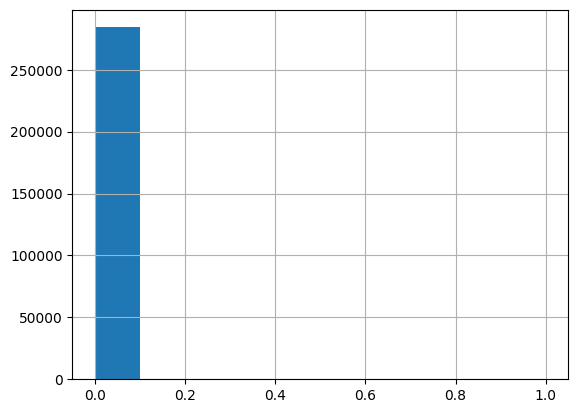

In [58]:
df['Class'].hist()

In [39]:
X = new_df.drop(columns='Class' , axis=1)
Y= new_df['Class']

In [40]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
5172      4922.0 -1.388230  1.754729  0.791172  1.556592 -0.298529 -0.006698   
80652    58587.0 -5.266750 -3.173136  0.081456  2.491010 -1.840291  1.631901   
213404  139244.0 -2.454750  0.220178  0.867207 -2.318846  0.299852 -0.100727   
233545  147607.0 -0.366975  1.084768  0.285284 -0.325691 -0.407682 -1.697776   
200565  133485.0  1.090886 -1.655609 -2.167390  1.421013  0.220694  0.468040   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [41]:
print(Y)

5172      0
80652     0
213404    0
233545    0
200565    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [42]:
# Now spilit the data into training data and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , stratify=Y , random_state=2)
                                        

In [43]:
print(X.shape , X_train.shape , X_test.shape)

(984, 30) (787, 30) (197, 30)


In [44]:
model = LogisticRegression()

In [45]:
# Now training with logistic regression
model.fit(X_train , Y_train)

LogisticRegression()

In [49]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data ' , train_data_accuracy)

Accuracy on Training data  0.9199491740787802


In [53]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [54]:
print('Accuracy on Testing data ' , test_data_accuracy)

Accuracy on Testing data  0.9086294416243654
